<a href="https://colab.research.google.com/github/JosepCristobal/DeepLearningPT/blob/master/DeepLearningPTv03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica del módulo Deep Learning
V.3.02


In [0]:
#!pip freeze | grep -i tensorflow
# si vuestra versión no es la 1.15.0 o tenéis tensorflow en vez de tensorflow-gpu, haced:
 !pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 41kB/s 


In [0]:
# En primer lugar, cargamos las librerías necesarias para iniciar nuestro proyecto

import numpy as np
import pandas as pd

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
#Al final se decide no montar la unidad del drive. Para hacerlo mas portable y poderlo compartir
#Opto por la carga de ficheros compartidos en google drive.

In [2]:
#Verificamos el contenido del directorio actual y verificamos que ./data no está creado
ls -la

total 16
drwxr-xr-x 1 root root 4096 Feb  5 18:37 ./
drwxr-xr-x 1 root root 4096 Feb 10 23:54 ../
drwxr-xr-x 1 root root 4096 Feb  7 17:12 .config/
drwxr-xr-x 1 root root 4096 Feb  5 18:37 sample_data/


In [0]:
#Creamos el directorio data para almacenar nuestos datasets
mkdir ./data


In [4]:
cd ./data

/content/data


In [0]:
mkdir ./img

In [0]:
 #Descargamos el fichero a través del enlace que nos proporciona el dirve al compartir


file_download_link = "https://drive.google.com/u/0/uc?id=1wFO_EmZ4obvgLilprhu8f4fdde1iA_nA&export=download"

In [7]:
#Iniciamos la descarga con wget
!wget -O airbnb-listings.csv --no-check-certificate "$file_download_link"


--2020-02-10 23:56:57--  https://drive.google.com/u/0/uc?id=1wFO_EmZ4obvgLilprhu8f4fdde1iA_nA&export=download
Resolving drive.google.com (drive.google.com)... 108.177.119.100, 108.177.119.138, 108.177.119.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n6ilrbs71ul9m5nlgkeo7p2m9pr5hkp8/1581378300000/12628573951437624671/*/1wFO_EmZ4obvgLilprhu8f4fdde1iA_nA?e=download [following]
--2020-02-10 23:57:02--  https://doc-04-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n6ilrbs71ul9m5nlgkeo7p2m9pr5hkp8/1581378300000/12628573951437624671/*/1wFO_EmZ4obvgLilprhu8f4fdde1iA_nA?e=download
Resolving doc-04-b4-docs.googleusercontent.com (doc-04-b4-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-04-b4-docs.googleusercontent.com

In [8]:
#Verificamos que se ha descargado el fichero de airbnb

!ls -la

total 58964
drwxr-xr-x 3 root root     4096 Feb 10 23:56 .
drwxr-xr-x 1 root root     4096 Feb 10 23:56 ..
-rw-r--r-- 1 root root 60364800 Feb 10 23:57 airbnb-listings.csv
drwxr-xr-x 2 root root     4096 Feb 10 23:56 img


In [0]:
# Empezamos con la incorporación de los datos del fichero csv de Airbnb para generar nuestro dataset
# Y visualizamos los primeros elementos de forma transversal

airbnb_Data = pd.read_csv("./airbnb-listings.csv", sep=";", decimal=".")

#airbnb_Data.head(5).T

In [10]:
#Calculamos el número de muestras y la dimensionalidad inicial.
N, d = airbnb_Data.shape
print(f'Numero de muestras actual es de {N} y la dimensionalidad es de {d}')

Numero de muestras actual es de 14780 y la dimensionalidad es de 89


In [0]:
# Procedemos a eliminar rows que creemos no son necesarias de airbnb_Data.

airbnb_Data.drop(['Listing Url', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description','Experiences Offered'
                  ,'Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules',
                  'Medium Url', 'Picture Url',
                'XL Picture Url', 'Host ID', 'Host URL','Host Name','Host About','Host Thumbnail Url'
                  ,'Host Picture Url','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Features',
                 'Host Location','Neighbourhood Cleansed','License','Jurisdiction Names','Host Acceptance Rate'
                 ,'Amenities','Calendar last Scraped','Calendar Updated','Host Since','State','Market'
                ,'Smart Location','Has Availability','First Review','Last Review','Weekly Price','Monthly Price',
                 'Host Response Time','Geolocation'],
                 axis=1,inplace=True)

In [12]:
# En esta celda, filtraremos las poblaciones que contengan Madrid
# El csv descargado debía contener únicamente datos pertenecientes a Madrid

#Borramos todos los valores nulo en City
airbnb_Data.dropna(subset=['City'],inplace=True)

#Cargamos el Dataset con las poblaciones que contengan Madrid no teniendo en cuenta mayúsculas y minúsculas.
airbnb_Data = airbnb_Data[airbnb_Data["City"].str.contains('Madrid', na=False, case=False) ]

#Mostramos un conteo de todos los resultados agrupados por City
airbnb_Data["City"].value_counts()

Madrid                                 13207
Madrid, Comunidad de Madrid, ES           20
madrid                                     8
MADRID                                     2
Aravaca (Madrid)                           1
Comunidad de Madrid                        1
Madrid, Vallecas (Fontarrón)               1
Delicias-Madrid                            1
Madrid, Comunidad de Madrid, ESPANA        1
las matas  madrid                          1
Chueca, Madrid                             1
Centro, Madrid                             1
Name: City, dtype: int64

In [13]:
#A continuación borraremos todos los registros que su precio sea nulo. Es nuestro target
print('Datos airbnb antes del borrado de NaN en Price: ', airbnb_Data.shape)

Datos airbnb antes del borrado de NaN en Price:  (13245, 42)


In [0]:
#Nuestro target es el precio, por lo tanto no podemos admitir registros sin precio
airbnb_Data.dropna(subset=['Price'],inplace=True)

In [0]:
#Nuestra base de imágenes para su análisis es el campo 'Thumbnail Url' por lo tanto 
#borraremos los registros sin valor
airbnb_Data.dropna(subset=['Thumbnail Url'],inplace=True)

In [16]:
print('Datos airbnb después del borrado de NaN en Price y en Thumbnail Url: ', airbnb_Data.shape)

Datos airbnb después del borrado de NaN en Price y en Thumbnail Url:  (10759, 42)


In [17]:
#Añadiremos una nueva columna para categorizar los precions en 3 categorias; barato , normal, caro
#Primero buscaremos la media, máximo y mínimo
airbnb_Data['Price'].describe()


count    10759.000000
mean        61.517427
std         52.322154
min          9.000000
25%         30.000000
50%         50.000000
75%         75.000000
max        850.000000
Name: Price, dtype: float64

In [18]:
#Con estos resultados, procederemos a marcar <=30 = Barato, de 31 a 75 = normal, mas de 75 = Caro
airbnb_Data.loc[ airbnb_Data['Price'] <= 30, 'PriceCat' ] = 'cheap'
airbnb_Data.loc[ airbnb_Data['Price'] > 30 , 'PriceCat' ] = 'medium'
airbnb_Data.loc[ airbnb_Data['Price'] > 75 , 'PriceCat' ] = 'expesive'
df = airbnb_Data.groupby('PriceCat')['ID'].nunique()

print (df)

PriceCat
cheap       3014
expesive    2643
medium      5102
Name: ID, dtype: int64


In [19]:
from keras.utils import to_categorical
#Categorizamos las variables que intuitivamente creemos pueden tener influencia en el resultado final
#En el dataset de Training

# opción con LabelEncoder
from sklearn import preprocessing
le0 = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()


airbnb_Data['Property Type'].fillna('nan', inplace = True)
le0.fit(airbnb_Data['Property Type'])
airbnb_Data['Property Type'] = le0.transform(airbnb_Data['Property Type'])

airbnb_Data['Bed Type'].fillna('nan', inplace = True)
le1.fit(airbnb_Data['Bed Type'])
airbnb_Data['Bed Type'] = le1.transform(airbnb_Data['Bed Type'])

airbnb_Data['Room Type'].fillna('nan', inplace = True)
le2.fit(airbnb_Data['Room Type'])
airbnb_Data['Room Type'] = le2.transform(airbnb_Data['Room Type'])

airbnb_Data['PriceCat'].fillna('nan', inplace = True)
le3.fit(airbnb_Data['PriceCat'])
airbnb_Data['PriceCat'] = le3.transform(airbnb_Data['PriceCat'])

airbnb_Data['Cancellation Policy'].fillna('nan', inplace = True)
le4.fit(airbnb_Data['Cancellation Policy'])
airbnb_Data['Cancellation Policy'] = le4.transform(airbnb_Data['Cancellation Policy'])

airbnb_Data['Neighbourhood Group Cleansed'].fillna('nan', inplace = True)
le6.fit(airbnb_Data['Neighbourhood Group Cleansed'])
airbnb_Data['Neighbourhood Group Cleansed'] = le6.transform(airbnb_Data['Neighbourhood Group Cleansed'])

airbnb_Data['Zipcode'].fillna('00000', inplace = True)
le7.fit(airbnb_Data['Zipcode'])
airbnb_Data['Zipcode'] = le7.transform(airbnb_Data['Zipcode'])


print(list(le0.classes_))
print(list(le1.classes_))
print(list(le2.classes_))
print(list(le3.classes_))
print(list(le4.classes_))
print(list(le6.classes_))
print(list(le7.classes_))


Using TensorFlow backend.


['Apartment', 'Bed & Breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Casa particular', 'Chalet', 'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Other', 'Serviced apartment', 'Tent', 'Timeshare', 'Townhouse', 'Villa']
['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']
['Entire home/apt', 'Private room', 'Shared room']
['cheap', 'expesive', 'medium']
['flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60']
['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']
['00000', '20126', '2015', '25008', '27004', '27013', '28', '28001', '280013', '28002', '28002\n28002', '28003', '28004', '28005', '28006', '28007', '28008', '28009', '28010', '28011', '28012', '28013'

In [20]:
airbnb_Data.head(5)

,ID,Thumbnail Url,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,City,Zipcode,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,PriceCat
43,6478626,https://a0.muscache.com/im/pictures/86864154/1...,84.0,3.0,3.0,13,Madrid,15,ES,Spain,40.406953,-3.670894,0,1,2,2.0,1.0,1.0,4,NaN,28.0,NaN,NaN,1,5,1,1125,0,3,12,240,171,87.0,9.0,9.0,9.0,9.0,9.0,9.0,0,3.0,7.71,0
44,4941335,https://a0.muscache.com/im/pictures/69897767/2...,100.0,1.0,1.0,14,Madrid,7,ES,Spain,40.425904,-3.681647,0,0,2,1.0,0.0,1.0,4,NaN,58.0,100.0,NaN,1,0,2,1125,4,9,9,15,52,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0,2.03,2
45,12510355,https://a0.muscache.com/im/pictures/dbcf7393-b...,100.0,2.0,2.0,14,Madrid,7,ES,Spain,40.428352,-3.687155,0,0,3,1.0,0.0,2.0,4,NaN,70.0,150.0,30.0,2,15,2,1125,7,15,32,292,36,87.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1.0,3.28,2
46,4756811,https://a0.muscache.com/im/pictures/59706828/a...,100.0,8.0,8.0,14,Madrid,7,ES,Spain,40.427454,-3.685763,0,1,1,1.0,1.0,1.0,4,NaN,26.0,NaN,NaN,1,0,7,1125,14,37,59,334,15,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2,7.0,0.57,0
47,15332216,https://a0.muscache.com/im/pictures/20e6f47e-2...,100.0,2.0,2.0,14,Madrid,7,ES,Spain,40.428671,-3.685423,0,0,6,1.0,2.0,3.0,4,NaN,70.0,NaN,20.0,1,10,2,1125,0,0,0,52,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,NaN,2


In [0]:
#Una vez hemos aplicado todos los filtros hasta este momento y teniendo en cuenta que hemos 
#seleccionado solamente los datos de Madrid, las dimensiones de City,Country Code y Country, no las categorizamos
#y procedemos a hacer un drop de ellas.
airbnb_Data.drop(['City','Country Code','Country'],axis=1,inplace=True)


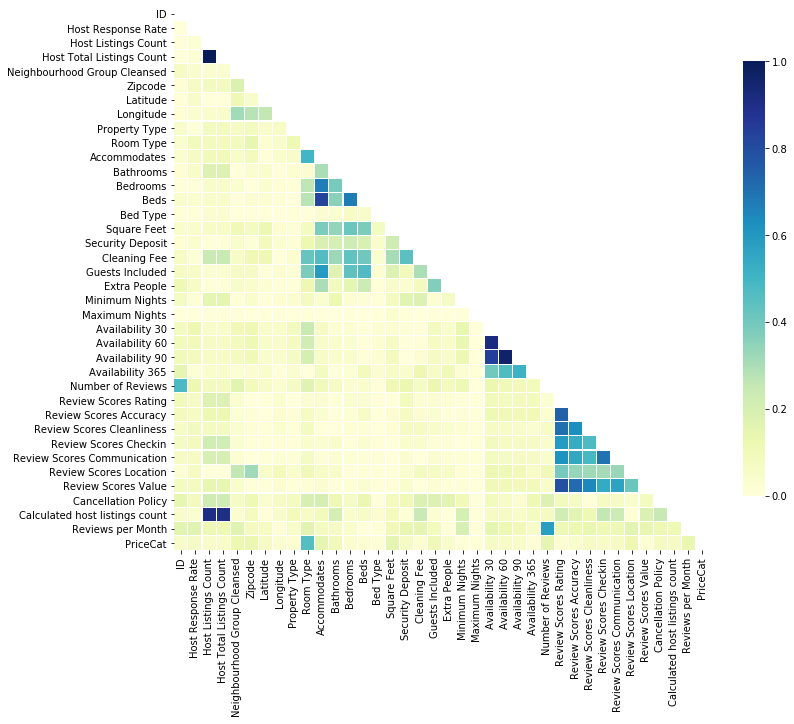

In [22]:
#Ahora haremos un estudio de variables fuertemente correladas para hacer un dataset más limpio 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [0]:
#Procedemos a eliminar las variables altamente correladas.

airbnb_Data.drop(['Host Listings Count','Host Total Listings Count','Accommodates','Availability 30'
                  , 'Availability 60', 'Availability 90','Availability 365','Review Scores Rating'
                  ,'Review Scores Accuracy','Review Scores Checkin','Host Listings Count'],
                 axis=1,inplace=True)

In [24]:
#Revisamos los nobres para sustituirlos por otros sin espacios.
airbnb_Data.columns[0:]

Index(['ID', 'Thumbnail Url', 'Host Response Rate',
       'Neighbourhood Group Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Cleanliness',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'PriceCat'],
      dtype='object')

In [0]:
#Una vez hemos determinado que dimensiones no van quedando, procedemos a cambiar el nombre de las columnas.
airbnb_Data.columns = ['id','thumbnail','response_rate','barrios', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'Price', 'security_deposit', 'cleaning_fee',
       'guests_inc', 'extra_people', 'min_nights', 'max_nights',
       'num_reviews', 'rs_cleanliness',
       'rs_communication', 'rs_location',
       'rs_value', 'cancellation_policy',
       'calculated_host', 'reviews_month','PriceCat']



In [26]:
print (airbnb_Data.dtypes)

id                       int64
thumbnail               object
response_rate          float64
barrios                  int64
zipcode                  int64
latitude               float64
longitude              float64
property_type            int64
room_type                int64
bathrooms              float64
bedrooms               float64
beds                   float64
bed_type                 int64
square_feet            float64
Price                  float64
security_deposit       float64
cleaning_fee           float64
guests_inc               int64
extra_people             int64
min_nights               int64
max_nights               int64
num_reviews              int64
rs_cleanliness         float64
rs_communication       float64
rs_location            float64
rs_value               float64
cancellation_policy      int64
calculated_host        float64
reviews_month          float64
PriceCat                 int64
dtype: object


In [0]:
#Reemplazamos todos los valores nulos del dataset con 0
airbnb_Data.fillna(0, inplace = True)


In [28]:
#Hacemos la comprobación de que no nos han quedado valores nulos
airbnb_Data.isnull().any()

id                     False
thumbnail              False
response_rate          False
barrios                False
zipcode                False
latitude               False
longitude              False
property_type          False
room_type              False
bathrooms              False
bedrooms               False
beds                   False
bed_type               False
square_feet            False
Price                  False
security_deposit       False
cleaning_fee           False
guests_inc             False
extra_people           False
min_nights             False
max_nights             False
num_reviews            False
rs_cleanliness         False
rs_communication       False
rs_location            False
rs_value               False
cancellation_policy    False
calculated_host        False
reviews_month          False
PriceCat               False
dtype: bool

In [29]:
#Procedemos a eliminar outliers de Price<=500 bedrooms<=5 bathrooms<=5
my_filter1 = airbnb_Data['Price']<=500
my_filter2 = airbnb_Data['bedrooms']<=5
my_filter3 = airbnb_Data['bathrooms']<=5
airbnb_Data = airbnb_Data[my_filter1]
airbnb_Data = airbnb_Data[my_filter2]
airbnb_Data = airbnb_Data[my_filter3]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
#Ahora procederemos a generar 2 datasets partiendo del principal. Uno será para trabajar con 
#la predicción de los precios
#Y en el otro dataset tendremos las urls de las imágenes para poderlas descargar y trabajar
#en una red convolucional.

#Procedemos con el dataset de imágenes.
airbnb_img = airbnb_Data[['id','thumbnail','Price']]
airbnb_img['idFoto'] = 0
airbnb_img['foto'] = 0
airbnb_img.head(5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,thumbnail,Price,idFoto,foto
43,6478626,https://a0.muscache.com/im/pictures/86864154/1...,28.0,0,0
44,4941335,https://a0.muscache.com/im/pictures/69897767/2...,58.0,0,0
45,12510355,https://a0.muscache.com/im/pictures/dbcf7393-b...,70.0,0,0
46,4756811,https://a0.muscache.com/im/pictures/59706828/a...,26.0,0,0
47,15332216,https://a0.muscache.com/im/pictures/20e6f47e-2...,70.0,0,0


In [31]:
#Seguimos con el de datos
airbnb_dat = airbnb_Data[airbnb_Data.columns.drop(['thumbnail'])]# quitamos el campo que contiene las urls de las imágenes.
airbnb_dat.head(3)

,id,response_rate,barrios,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,square_feet,Price,security_deposit,cleaning_fee,guests_inc,extra_people,min_nights,max_nights,num_reviews,rs_cleanliness,rs_communication,rs_location,rs_value,cancellation_policy,calculated_host,reviews_month,PriceCat
43,6478626,84.0,13,15,40.406953,-3.670894,0,1,2.0,1.0,1.0,4,0.0,28.0,0.0,0.0,1,5,1,1125,171,9.0,9.0,9.0,9.0,0,3.0,7.71,0
44,4941335,100.0,14,7,40.425904,-3.681647,0,0,1.0,0.0,1.0,4,0.0,58.0,100.0,0.0,1,0,2,1125,52,10.0,10.0,10.0,10.0,1,1.0,2.03,2
45,12510355,100.0,14,7,40.428352,-3.687155,0,0,1.0,0.0,2.0,4,0.0,70.0,150.0,30.0,2,15,2,1125,36,9.0,10.0,10.0,9.0,0,1.0,3.28,2


# Empezamos a tratar nuestra red NN para predecir los precios, sólo con los datos de nuestro dataset (regresión)

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [33]:
#Variables, asignamos la x y y normalizamos
y = airbnb_dat['Price'].values   # nos quedamos con la columna Price
x = airbnb_dat[airbnb_dat.columns.drop(['Price'])].values # nos quedamos con el resto

y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
#Separamos el dataset en train y test ya con los datos normalizados
#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.20, shuffle=True, random_state=0)

In [35]:
model = Sequential()
model.add(Dense(12, input_dim=28, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                348       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [37]:
#history = model.fit(X_train, y_train, epochs=150, batch_size=50, verbose=1,validation_split=0.2,validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1,validation_data=(X_test, y_test))

Train on 8563 samples, validate on 2141 samples
Epoch 1/50
8563/8563 [==============================] - 2s 238us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - mean_absolute_error: 0.0476 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - val_mean_absolute_error: 0.0348
Epoch 2/50
8563/8563 [==============================] - 0s 51us/sample - loss: 0.0035 - mean_squared_error: 0.0035 - mean_absolute_error: 0.0322 - val_loss: 0.0032 - val_mean_squared_error: 0.0032 - val_mean_absolute_error: 0.0295
Epoch 3/50
8563/8563 [==============================] - 0s 54us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0300 - val_loss: 0.0030 - val_mean_squared_error: 0.0030 - val_mean_absolute_error: 0.0303
Epoch 4/50
8563/8563 [==============================] - 0s 52us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0294 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - val_mean_absolute_error: 0.0268
Epoch 5/50
8563/8563 [=====

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


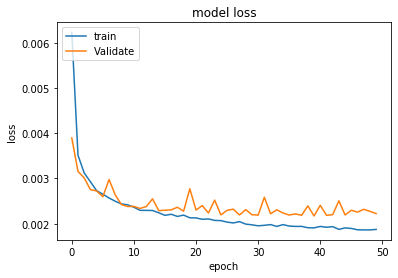

In [38]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validate'], loc='upper left')
plt.show()

In [0]:
#Decidimos que haremos con el modelo

# Empezamos a tratar nuestra red NN para clasificación. Categorizamos los precios.

In [39]:
#Variables, asignamos la x y y normalizamos
y = airbnb_dat['PriceCat'].values   # nos quedamos con la columna Price
x = airbnb_dat[airbnb_dat.columns.drop(['PriceCat'])].values # nos quedamos con el resto

y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
#Separamos el dataset en train y test ya con los datos normalizados
#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.20, shuffle=True, random_state=0)

In [41]:
model = Sequential()
model.add(Dense(12, input_dim=28, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                348       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50, verbose=1,validation_data=(X_test, y_test))

Train on 8563 samples, validate on 2141 samples
Epoch 1/50
8563/8563 [==============================] - 0s 56us/sample - loss: 1.3875 - acc: 0.2830 - val_loss: 1.4098 - val_acc: 0.2742
Epoch 2/50
8563/8563 [==============================] - 0s 46us/sample - loss: 1.3667 - acc: 0.2828 - val_loss: 1.3663 - val_acc: 0.2742
Epoch 3/50
8563/8563 [==============================] - 0s 46us/sample - loss: 1.3831 - acc: 0.2825 - val_loss: 1.4283 - val_acc: 0.2742
Epoch 4/50
8563/8563 [==============================] - 0s 45us/sample - loss: 1.4037 - acc: 0.2830 - val_loss: 1.4147 - val_acc: 0.2742
Epoch 5/50
8563/8563 [==============================] - 0s 48us/sample - loss: 1.3967 - acc: 0.2832 - val_loss: 1.4128 - val_acc: 0.2742
Epoch 6/50
8563/8563 [==============================] - 0s 47us/sample - loss: 1.3956 - acc: 0.2828 - val_loss: 1.4105 - val_acc: 0.2742
Epoch 7/50
8563/8563 [==============================] - 0s 47us/sample - loss: 1.3903 - acc: 0.2828 - val_loss: 1.4104 - val_acc: 

# Empezamos a analizar las imágenes en una CNN

In [51]:
#De momento no lo utilizamos ya que queremos dar un paso más y no guardar las imágenes en disco
#Lo que estoy intentando es cargarlas directamente en un dataset.
#Dejo el código sin comentar. Funciona correctamente, pero prefiero probar de trabajar en memoria.

import requests
idsbad = []
rownum = 0

for row in airbnb_img.itertuples():
  #print (row.thumbnail)
  rownum +=1
  Photo_URL = row.thumbnail
  image = row.id
  
  Picture_request = requests.get(Photo_URL)
  if Picture_request.status_code == 200:
    with open("./img/"+ str(image) +".jpg", 'wb') as f:
        f.write(Picture_request.content)
  else:
    idsbad.append(image)
    #Ponemos un límite de 5 registros para nuestras pruebas
  if rownum > 5:
    break
#idsbad lo utilizamos para recoger todos los registros que no tienen imagen, para posteriormente tratarlas.
idsbad

[]

(144, 216, 3)


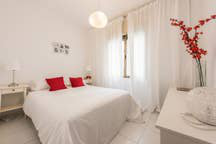

(144, 216, 3)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


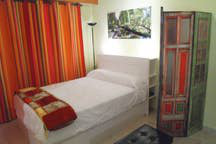

(144, 216, 3)


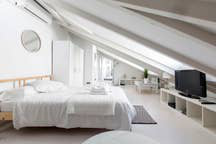

(144, 216, 3)


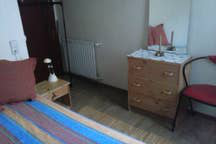

(144, 216, 3)


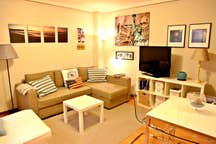

(144, 216, 3)


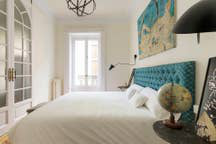

(144, 216, 3)


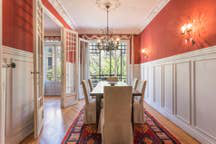

(144, 216, 3)


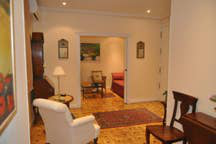

(144, 216, 3)


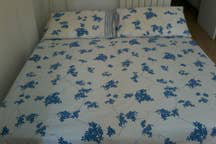

(144, 216, 3)


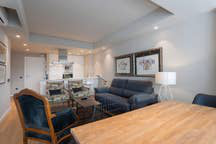

[]

In [52]:
import requests
import numpy as np
import urllib
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

idsbad = []
images = []
rownum = 0
dataA = np.empty((N, 144, 216, 3), dtype=np.uint8)
input_shape = (144, 216, 3)

for row in airbnb_img.itertuples():
  #print (row.thumbnail)

  Photo_URL = row.thumbnail
  image = row.id
  
  Picture_request = requests.get(Photo_URL)
  if Picture_request.status_code == 200:
    image3 = io.imread(Photo_URL)
    imageF = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
    print  (imageF.shape)
    if imageF.shape != (144,216,3):
          imageF=np.resize(imageF, (input_shape[0], input_shape[1], 3))
    
    #cv2_imshow( image3) #Visualizamos la imagen antes de transformarla a RGB
    cv2_imshow(imageF) #Visualización de la imagen correcta
    #print('Image Dimensions :', imageF.shape)
    #dataA[rownum, ...] = imageF #.transpose(2, 0, 1)
    images.append(imageF)
    
    #Modificamos el idFoto de airbnb_img con el índice que hemos aplicado al nuevo dataset
    #airbnb_img.at[rownum,'idFoto'] = rownum
    airbnb_img.loc[airbnb_img.id == image, 'idFoto'] = rownum
    rownum +=1

    
  else:
    #Si no podemos descargar la imagen, crearemos un array de ceros
    idsbad.append(image)
    #dataA[rownum, ...] = np.zeros((144,216,3),dtype=np.uint8)
    images.append(np.zeros((144,216,3),dtype=np.uint8))
    airbnb_img.loc[airbnb_img.id == image, 'idFoto'] = rownum
    rownum +=1
  if rownum > 9:
    break

idsbad
#images
#dataA


In [0]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications import imagenet_utils

#Escalamos las imágenes dividiendo por 255
imagesArray = np.array(images)/255.
#imagesArray = np.expand_dims(imagesArray, axis=0)
preprocess = imagenet_utils.preprocess_input
#pre-procesamos la imagen
imagesArray = preprocess(imagesArray)

In [0]:
#airbnb_img.head(5)

In [54]:
#Creamos la variable primeros10 para limitar los registros para hacer las pruebas en desarrollo
#Esta Variable en su estado de producción debería ser airbnb_img
primeros10 = airbnb_img[:10]
primeros10

,id,thumbnail,Price,idFoto,foto
43,6478626,https://a0.muscache.com/im/pictures/86864154/1...,28.0,0,0
44,4941335,https://a0.muscache.com/im/pictures/69897767/2...,58.0,1,0
45,12510355,https://a0.muscache.com/im/pictures/dbcf7393-b...,70.0,2,0
46,4756811,https://a0.muscache.com/im/pictures/59706828/a...,26.0,3,0
47,15332216,https://a0.muscache.com/im/pictures/20e6f47e-2...,70.0,4,0
48,15825062,https://a0.muscache.com/im/pictures/e684a7f5-0...,108.0,5,0
49,3116679,https://a0.muscache.com/im/pictures/39774047/4...,260.0,6,0
50,3962279,https://a0.muscache.com/im/pictures/49838903/3...,60.0,7,0
51,16539166,https://a0.muscache.com/im/pictures/e1eb98be-2...,42.0,8,0
52,12416420,https://a0.muscache.com/im/pictures/13f63727-0...,160.0,9,0


In [55]:
from sklearn.model_selection import train_test_split
#Procedemos a separar el Training y el Test, usando 75% de
# los datos para training and y el resto 25% para testing
#Como hemos comentado anteriormente, el dataset es primeros10 que lo utilizamos para hacer las pruebas y no colapsar máquinas
split = train_test_split(primeros10, imagesArray, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split


print(f'Dimensiones del dataset de training: {trainAttrX.shape}')
print(f'Dimensiones del dataset de test: {testImagesX.shape}')

Dimensiones del dataset de training: (7, 5)
Dimensiones del dataset de test: (3, 144, 216, 3)


In [56]:
from sklearn.model_selection import train_test_split
#Separamos el dataset en train y test ya con los datos normalizados
#X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
trainAttrX, testAttrX, trainImagesX, testImagesX = train_test_split(primeros10, imagesArray, test_size=0.20, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {trainAttrX.shape}')
print(f'Dimensiones del dataset de test: {trainImagesX.shape}')



Dimensiones del dataset de training: (8, 5)
Dimensiones del dataset de test: (8, 144, 216, 3)


In [0]:
#A partir de aquí revisaremos que todo sea correcto

In [57]:

trainY = trainAttrX["Price"].values
testY = testAttrX["Price"].values

# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)

trainY=np.reshape(trainY,(-1,1))
testY=np.reshape(testY,(-1,1))

scaler_y_train = MinMaxScaler()
scaler_y_test = MinMaxScaler()
print(scaler_y_train.fit(trainY))
yscale_train=scaler_y_train.transform(trainY)

print(scaler_y_test.fit(testY))
yscale_test=scaler_y_test.transform(testY)

print(trainY)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
[[ 70.]
 [160.]
 [ 58.]
 [260.]
 [ 60.]
 [ 26.]
 [ 28.]
 [108.]]


In [58]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D

# importamos la capa regularización
from keras.regularizers import l2

# Inizializamos el modelo
model = Sequential()

# Definimos una capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(144, 216, 3)))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Definimos una tercera capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.summary()
# No Añadimos nuestro clasificador 
#model.add(Flatten())
#model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
#model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(trainImagesX, trainY,
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(testImagesX, testY)

# Evaluamos el modelo
scores = model.evaluate(testImagesX, testY)



SyntaxError: ignored

# Hasta aquí he llegado con mi código.
En este punto quería obtener un modelo de la red CNN para poder fusionarlo e integrarlo en un red neuronal convencional y poder terminar de entrenarlo para conseguir una predicción de precio a través de una regresión, fusionando imágenes y datos.
#A partir de este momento incluyo el código extraido y adaptado del ejemplo mencionado en la práctica.



In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1
  # define the model input
	inputs = Input(shape=inputShape)
 
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
 
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
  # flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
 
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)
 
	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)
 
	# construct the CNN
	model = Model(inputs, x)
 
	# return the CNN
	return model


In [0]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
maxPrice = trainAttrX["Price"].max()
trainY = trainAttrX["Price"] / maxPrice
testY = testAttrX["Price"] / maxPrice
 
# create our Convolutional Neural Network and then compile the model
# using mean absolute percentage error as our loss, implying that we
# seek to minimize the absolute percentage difference between our
# price *predictions* and the *actual prices*
model = create_cnn(216, 144, 3, regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
 
# train the model
print("[INFO] training model...")
model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
	epochs=200, batch_size=8)

[INFO] training model...


Train on 8 samples, validate on 2 samples
Epoch 1/200
8/8 [==============================] - 7s 818ms/step - loss: 274.8353 - val_loss: 1557.5942
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 356.6660 - val_loss: 423.5996
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 348.7175 - val_loss: 332.9897
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 170.8181 - val_loss: 436.8683
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 498.4073 - val_loss: 343.2598
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 490.0294 - val_loss: 200.0194
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 209.1449 - val_loss: 105.3404
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 294.1367 - val_loss: 70.1725
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 114.4080 - val_loss: 64.3722
Epoch 10/200
8/8 [===

In [0]:
import locale
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(testImagesX)
 
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
 
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(primeros10["Price"].mean(), grouping=True),
	locale.currency(primeros10["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))


[INFO] predicting house prices...
[INFO] avg. house price: $88.20, std house price: $72.31
[INFO] mean: 38.43%, std: 20.96%


# Hasta aquí he podido llegar con mi código y mi proyecto.